In [ ]:
%pip install numpy pandas matplotlib seaborn scikit-learn

In [41]:
import numpy as np
import pandas as pd

train_trans = pd.read_csv("train_transaction.csv")
train_idf = pd.read_csv("train_identity.csv")

test_trans = pd.read_csv("train_identity.csv")
test_idf = pd.read_csv("test_identity.csv")

In [42]:
train_df = pd.merge(train_trans,train_idf,how='left',on='TransactionID')
test_df = pd.merge(test_trans,test_idf,how='left',on='TransactionID')

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1,1,0,0,0,1,0,0,0,0,1,0,1,1,0.0,NaN,NaN,0.0,NaN,NaN,NaN,N

## Exploring M1-M9 Features
- 각 M 피처의 카테고리별 개수.
- 각 카테고리 내 사기 거래의 비율.
- 카테고리별 거래 금액 분포.

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# M 피처의 결측값을 "Miss"로 채움
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    train_df[col] = train_df[col].fillna("Miss")

# total 정의
total = len(train_df)
# total_amt 정의
total_amt = train_df.groupby(['isFraud'])['TransactionAmt'].sum().sum()

def ploting_dist_ratio(df, col, lim=2000):
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0: 'NoFraud', 1: 'Fraud'}, inplace=True)

    plt.figure(figsize=(20, 5))
    plt.suptitle(f'{col} Distributions ', fontsize=22)

    plt.subplot(121)
    palette = sns.color_palette("Set2", len(tmp[col].values))
    g = sns.countplot(x=col, data=df, order=list(tmp[col].values), hue=df[col], palette=palette, legend=False)
    g.set_title(f"{col} Distribution\nCount and %Fraud by each category", fontsize=18)
    g.set_ylim(0, 400000)
    gt = g.twinx()
    gt = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                       color='black', legend=False)
    gt.set_ylim(0, 20)
    gt.set_ylabel("% of Fraud Transactions", fontsize=16)
    g.set_xlabel(f"{col} Category Names", fontsize=16)
    g.set_ylabel("Count", fontsize=17)

    for p in gt.patches:
        height = p.get_height()
        gt.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:1.2f}%'.format(height),
                ha="center", fontsize=14)

    perc_amt = (train_df.groupby(['isFraud', col])['TransactionAmt'].sum() / total_amt * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0: 'NoFraud', 1: 'Fraud'}, inplace=True)

    plt.subplot(122)
    g1 = sns.boxplot(x=col, y='TransactionAmt', hue='isFraud',
                     data=df[df['TransactionAmt'] <= lim], order=list(tmp[col].values))
    g1t = g1.twinx()
    g1t = sns.pointplot(x=col, y='Fraud', data=perc_amt, order=list(tmp[col].values),
                        color='black', legend=False)
    g1t.set_ylim(0, 5)
    g1t.set_ylabel("%Fraud Total Amount", fontsize=16)
    g1.set_title(f"{col} by Transactions dist", fontsize=18)
    g1.set_xlabel(f"{col} Category Names", fontsize=16)
    g1.set_ylabel("Transaction Amount(U$)", fontsize=16)

    plt.subplots_adjust(hspace=.4, wspace=0.35, top=0.80)

    plt.show()

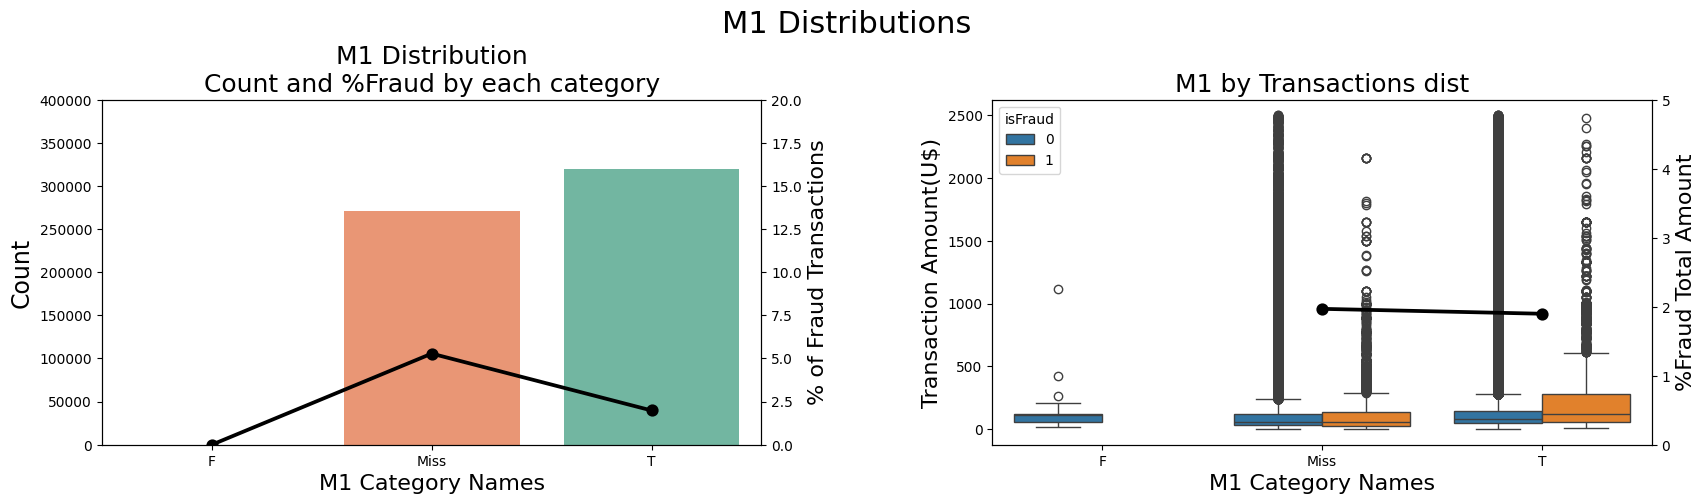

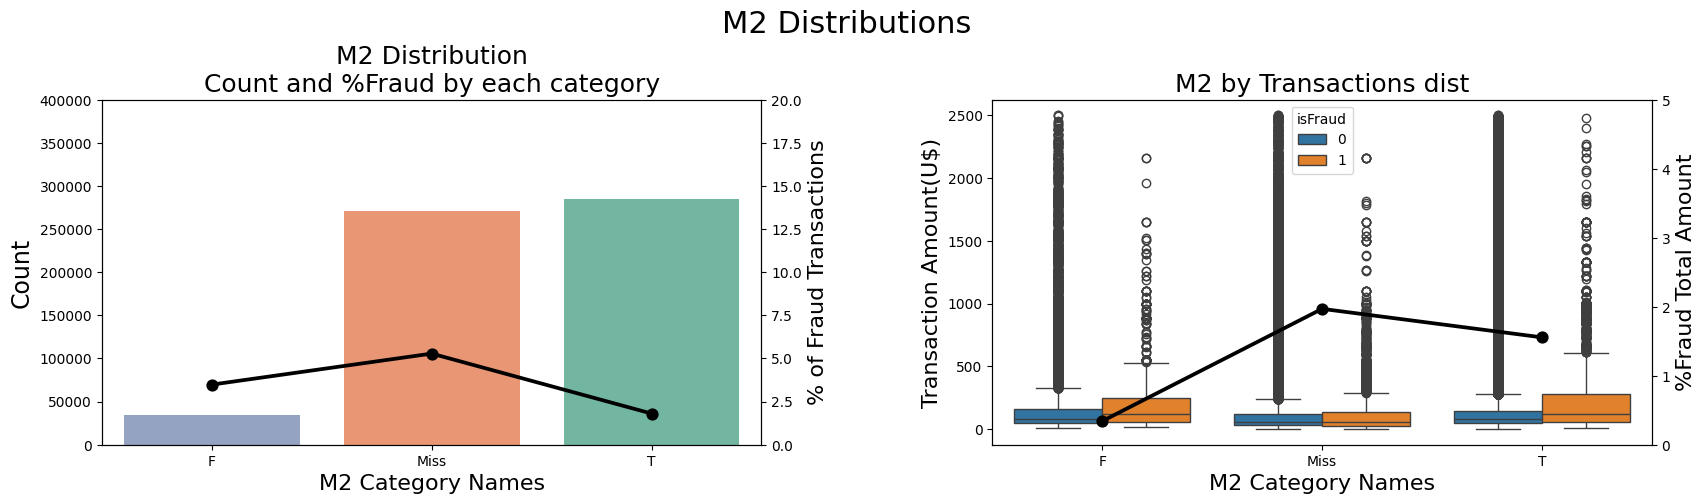

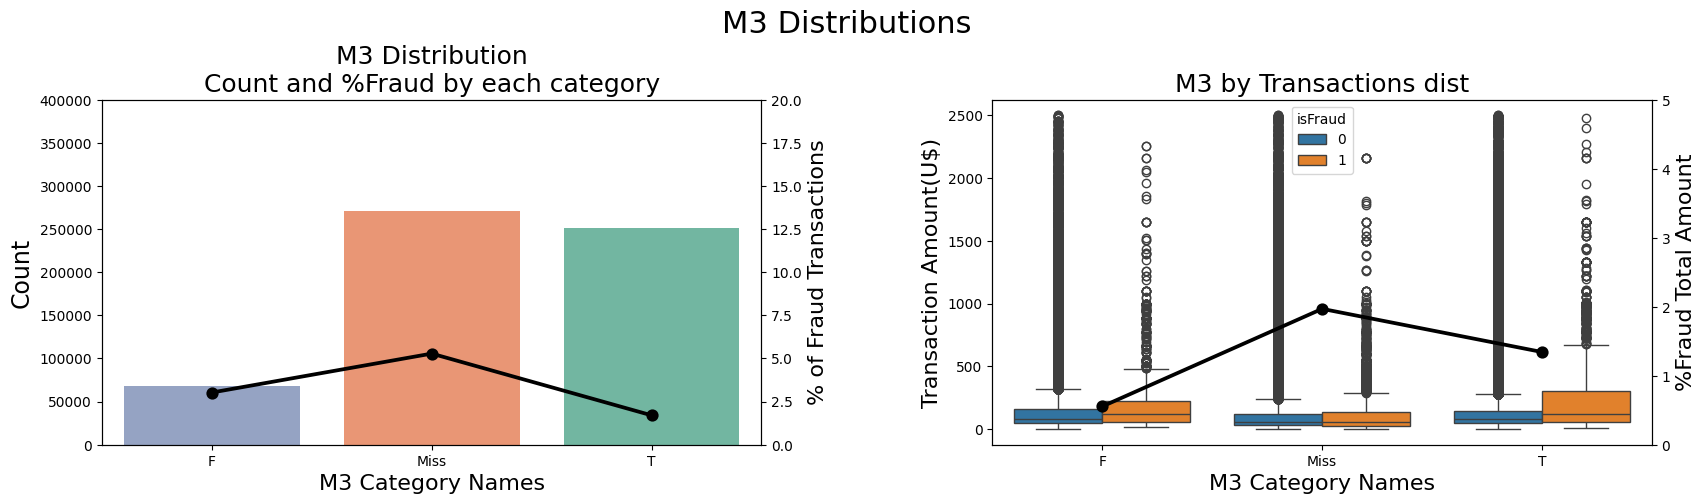

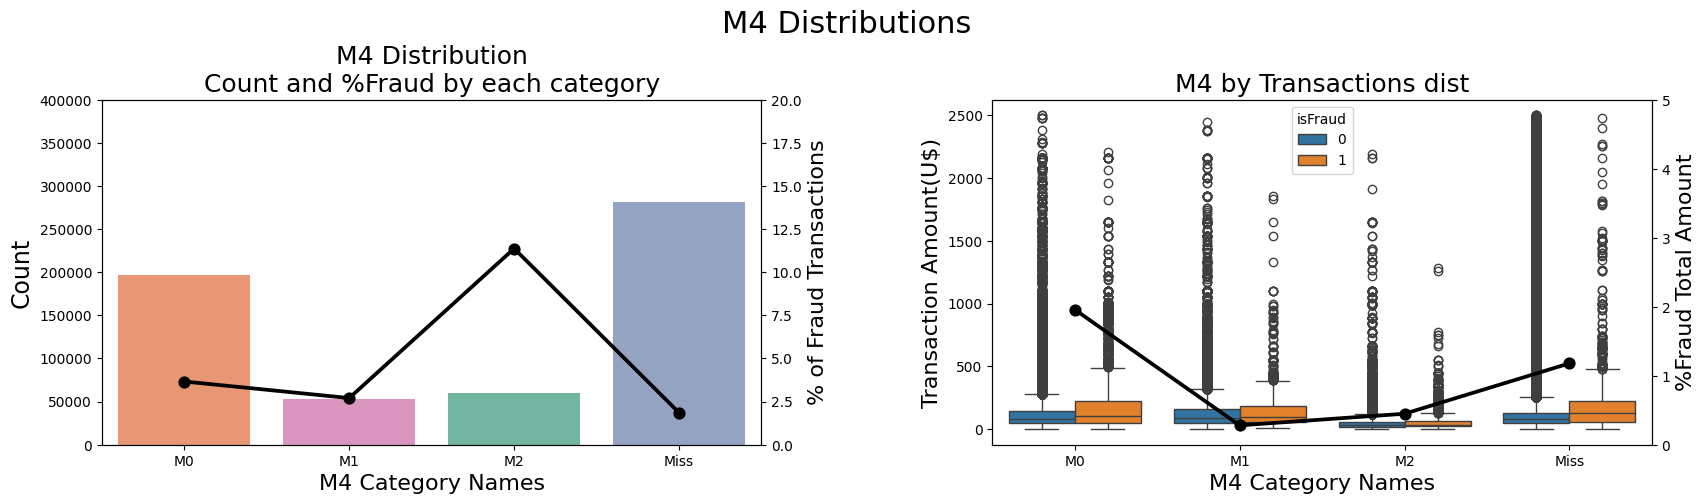

In [45]:
for col in ['M1', 'M2', 'M3', 'M4']:
    ploting_dist_ratio(train_df, col, lim=2500)

##### M1,M2,M3 는 Miss 값 즉, 결측치 부분에서 높은 사기 비율을 보여줌
##### M4 는 M2값에서 높은 사기 비율을 보여줌

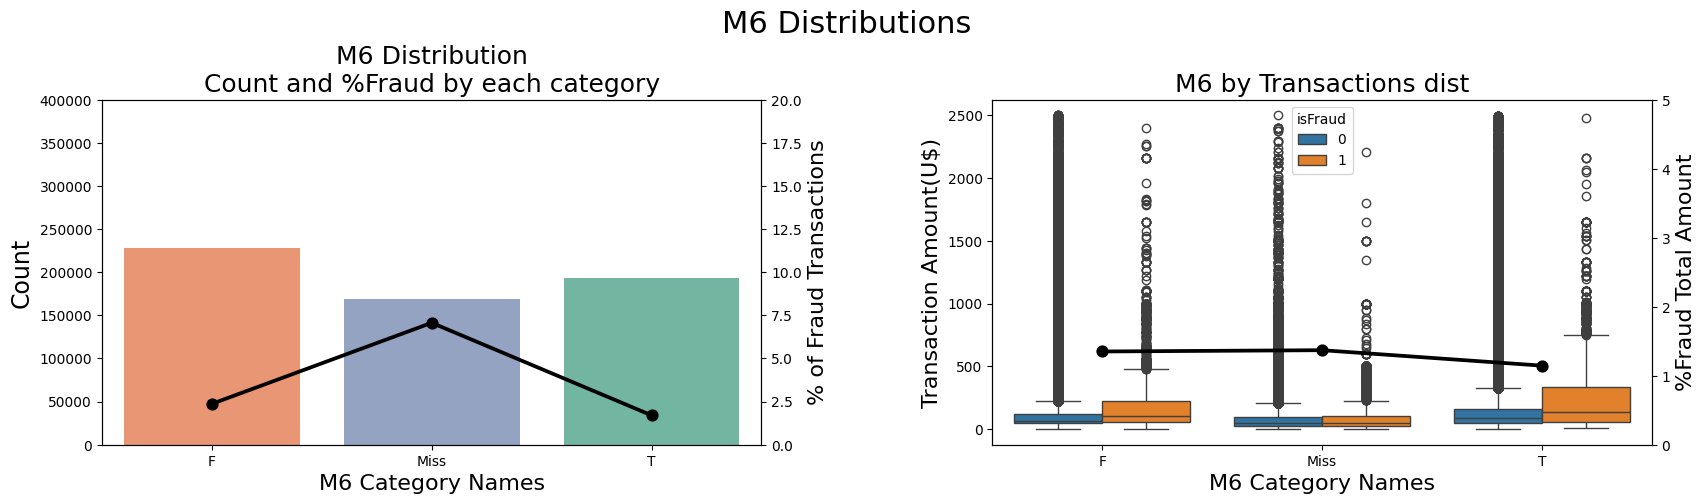

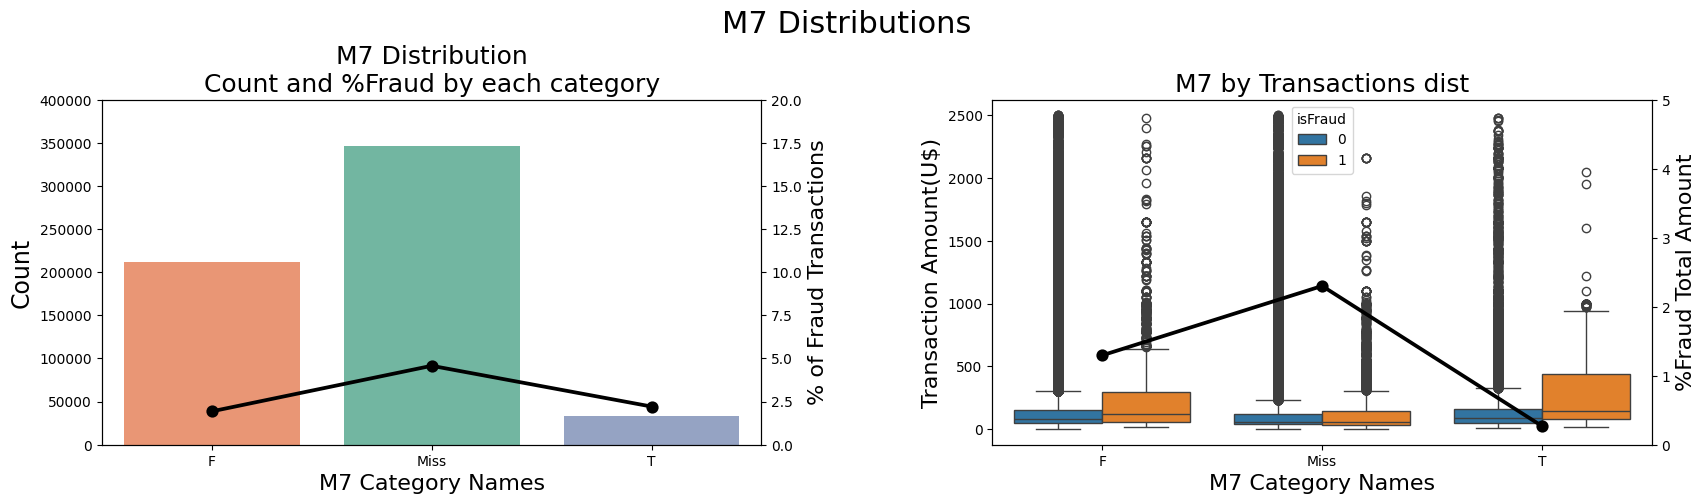

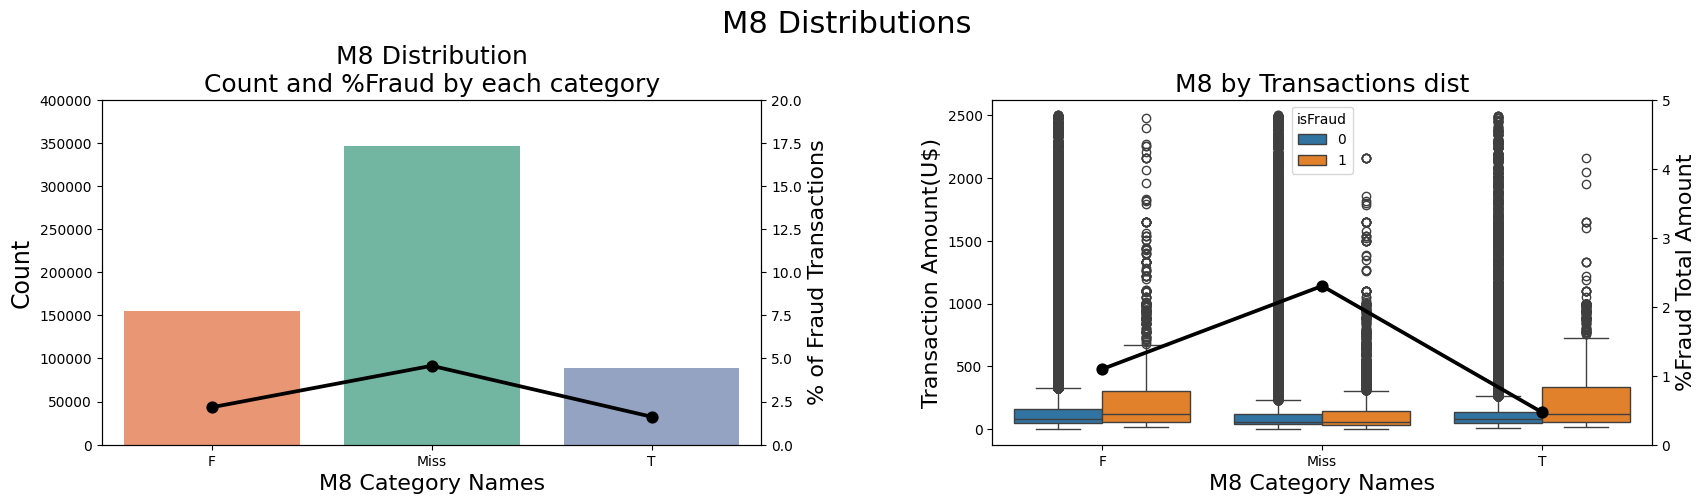

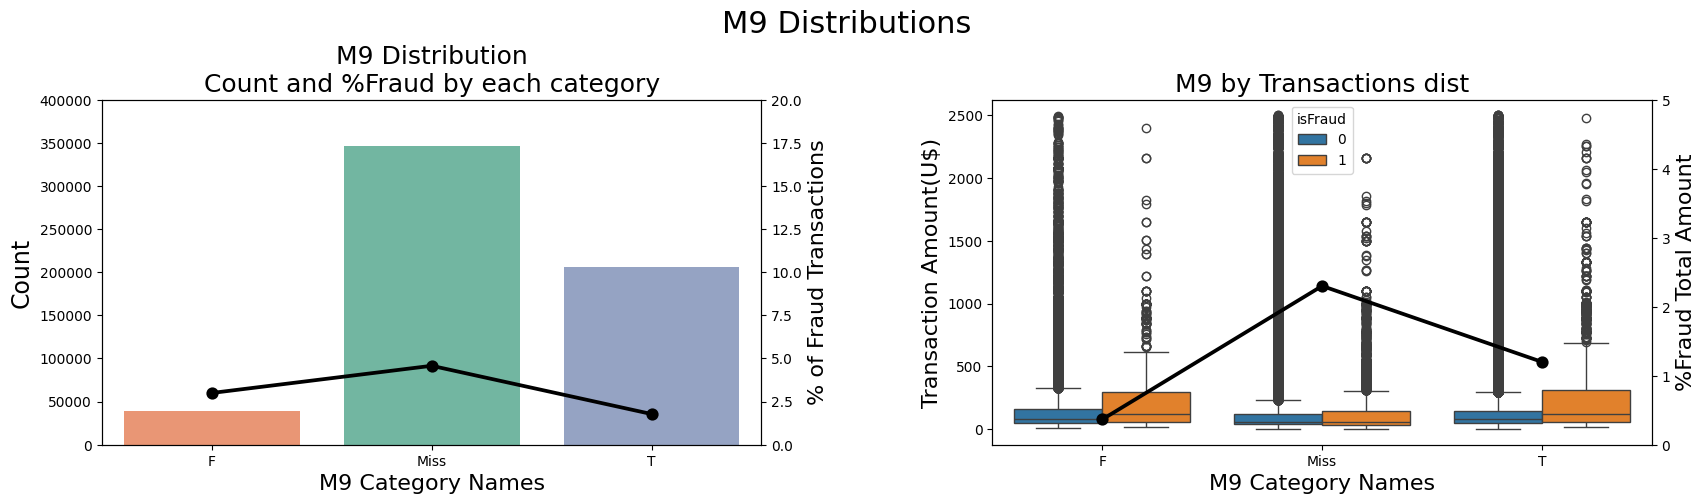

In [46]:
for col in ['M6', 'M7', 'M8', 'M9']:
    ploting_dist_ratio(train_df, col, lim=2500)

##### M5는 F,Miss,T 부분에서 차이가 많이 없어서 제거를 했음
##### 나머지 M피처들은 Miss 값에서 높은 사기 거래 비율을 가지고있음
---

In [47]:
train_df['card1'].value_counts()

card1
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
12695     7091
12544     6773
6019      6771
2803      6141
7585      5334
10616     5172
12839     5129
3154      4614
2616      4410
18132     4209
9633      4158
15497     3977
16132     3929
2884      3873
16075     3748
11207     3693
10112     3560
7508      3490
10057     3166
12501     3152
7826      3006
16659     2988
12577     2891
5812      2818
7664      2792
7861      2774
6530      2714
4461      2686
8320      2632
5033      2604
7207      2578
15063     2522
10486     2505
10023     2428
7815      2411
9112      2364
16560     2080
9026      2076
16136     2069
4806      2067
13832     2062
7676      2038
12932     1998
1444      1964
4436      1947
11839     1940
17399     1916
2772      1898
2455      1799
1675      1790
14290     1767
11157     1722
3821      1681
17055     1677
1893      1651
1974      1591
17131     1587
18018     1569
1724      1567
9803      1538
8528      1523
2392

### < card1과 M4 값을 이용한 이상 거래 탐지 >
##### **가설**
- 카드 정보(card1)와 거래 매치 여부(M4)의 조합이 사기 거래를 식별하는 데 유의미한 영향을 줄 수 있다?

##### **근거**
- 근거: card1은 카드의 식별 정보로, 사용자의 카드 사용 패턴을 반영합니다. M4는 거래 매치 정보를 나타내며, 거래의 일관성을 확인하는 데 사용

Index([ 7919,  9500, 15885, 17188, 15066, 12695, 12544,  6019,  2803,  7585,
       10616, 12839,  3154,  2616, 18132,  9633, 15497, 16132,  2884, 16075],
      dtype='int64', name='card1')


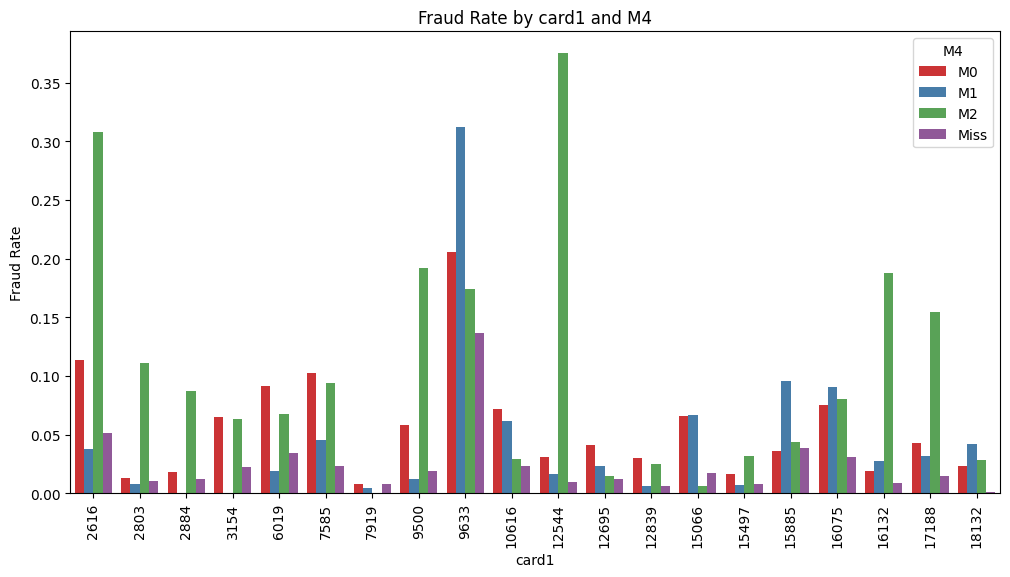

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 결측값 처리
train_df['M4'] = train_df['M4'].fillna('Miss')

# card1과 M4의 조합에 따른 사기 거래 비율 계산
grouped = train_df.groupby(['card1', 'M4'])['isFraud'].mean().reset_index()
grouped.columns = ['card1', 'M4', 'Fraud_Rate']

# 상위 몇 개의 card1 값만 사용 (빈도 수 기준으로 상위 20개)
top_card1 = train_df['card1'].value_counts().head(20).index
grouped_top = grouped[grouped['card1'].isin(top_card1)]
print(top_card1)

# 상위 20개의 card1 값을 오름차순으로 정렬
grouped_top = grouped_top.set_index('card1').loc[top_card1].reset_index()

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x='card1', y='Fraud_Rate', hue='M4', data=grouped_top, palette='Set1')
plt.title('Fraud Rate by card1 and M4')
plt.xlabel('card1')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=90)
plt.legend(title='M4')
plt.show()


1. **높은 사기 거래 비율**:   
특정 card1 값에서 M4가 M2일 때 사기 거래 비율이 특히 높습니다. 예를 들어, card1 값이 12695, 10516, 9500일 때 M2의 사기 거래 비율이 눈에 띄게 높습니다.
   
2. **일관된 패턴**:   
대부분의 card1 값에서 M4가 M2인 경우 사기 거래 비율이 상대적으로 높습니다. 이는 M4가 M2인 경우가 다른 경우보다 사기 거래와 더 높은 상관관계를 가질 수 있음을 시사합니다.   
   
3. **불규칙한 패턴**:   
몇몇 card1 값에서는 M4의 다른 값(M0, M1, Miss)이 높은 사기 거래 비율을 보입니다. 예를 들어, card1 값이 2616일 때 M0의 사기 거래 비율이 높습니다.
---

#### 히트맵

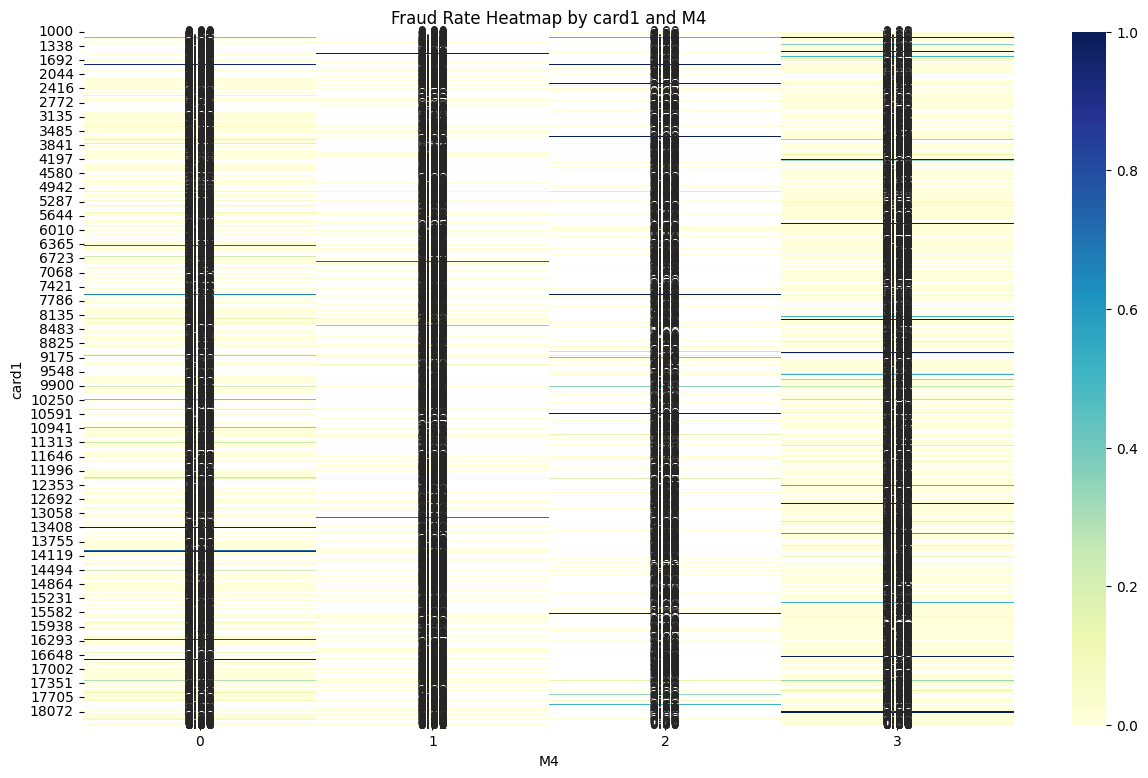

In [49]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 라벨 인코딩
label_enc = LabelEncoder()
train_df['M4_encoded'] = label_enc.fit_transform(train_df['M4'])

# 피벗 테이블 생성
pivot_table = train_df.pivot_table(index='card1', columns='M4_encoded', values='isFraud', aggfunc='mean')

# 히트맵 작성
plt.figure(figsize=(15, 9))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Fraud Rate Heatmap by card1 and M4')
plt.xlabel('M4')
plt.ylabel('card1')
plt.show()

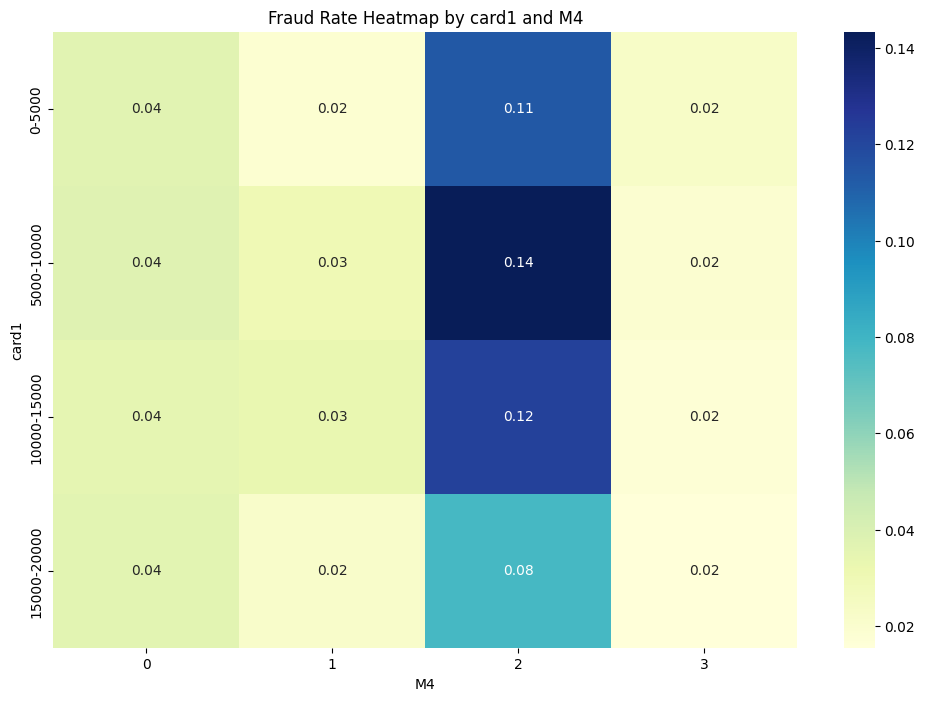

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 데이터프레임에서 필요한 열만 선택합니다.
df = train_df[['card1', 'M4', 'isFraud']].copy()

# 결측치를 'Miss'로 채웁니다.
df['M4'] = df['M4'].fillna('Miss')

# card1을 일정 범위로 그룹화합니다.
bins = [0, 5000, 10000, 15000, 20000]
labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000']
df['card1_group'] = pd.cut(df['card1'], bins=bins, labels=labels)

# 라벨 인코딩
label_enc = LabelEncoder()
df['M4_encoded'] = label_enc.fit_transform(df['M4'])

# 피벗 테이블 생성
pivot_table = df.pivot_table(index='card1_group', columns='M4_encoded', values='isFraud', aggfunc='mean', observed=False)

# 히트맵 작성
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title('Fraud Rate Heatmap by card1 and M4')
plt.xlabel('M4')
plt.ylabel('card1')
plt.show()

- M4피처에서 M2가 card1 의 5,000-10,000 부분과 가장 상관관계가 높다고 측정
- M4피처에서 M2가 card1 의 10,000-15,000 부분이 다음으로 상관관계가 높다고 측정

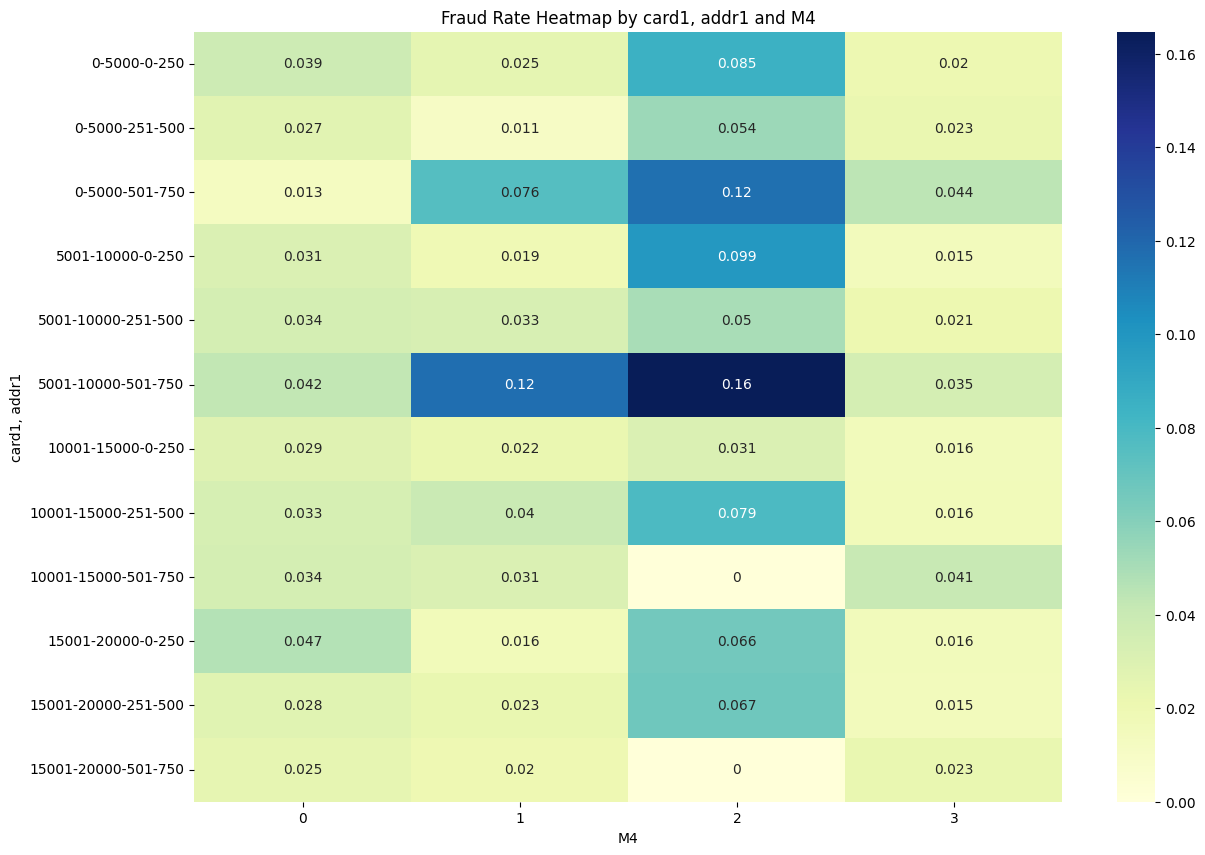

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# card1을 그룹화
bins_card1 = [0, 5000, 10000, 15000, 20000]
labels_card1 = ['0-5000', '5001-10000', '10001-15000', '15001-20000']
train_df['card1_group'] = pd.cut(train_df['card1'], bins=bins_card1, labels=labels_card1)

# addr1을 그룹화
bins_addr1 = [0, 250, 500, 750, 1000]
labels_addr1 = ['0-250', '251-500', '501-750', '751-1000']
train_df['addr1_group'] = pd.cut(train_df['addr1'], bins=bins_addr1, labels=labels_addr1)

# # M4를 라벨 인코딩
# label_encoder = LabelEncoder()
# train_df['M4_encoded'] = label_encoder.fit_transform(train_df['M4'])

# 피봇 테이블 생성
pivot_table = train_df.pivot_table(index=['card1_group', 'addr1_group'], columns='M4_encoded', values='isFraud', aggfunc='mean', observed=False)

# 히트맵 그리기
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Fraud Rate Heatmap by card1, addr1 and M4')
plt.xlabel('M4')
plt.ylabel('card1, addr1')
plt.show()

1. 높은 사기 거래 비율 (0.16):
- card1 값이 5001-10000이고, addr1 값이 501-750인 경우 M4 값이 2일 때 사기 거래 비율이 가장 높습니다.
2. 상대적으로 낮은 사기 거래 비율:
- 다른 대부분의 조합에서는 사기 거래 비율이 낮은 편입니다. 특히 card1 값이 15001-20000인 경우 전반적으로 사기 거래 비율이 낮습니다.

In [52]:
# M4 피처 라벨 인코딩
label_enc = LabelEncoder()
train_df['M4_encoded'] = label_enc.fit_transform(train_df['M4'])

# 파생 변수 생성
train_df['M4_M0'] = (train_df['M4'] == 'M0').astype(int)
train_df['M4_M1'] = (train_df['M4'] == 'M1').astype(int)
train_df['M4_M2'] = (train_df['M4'] == 'M2').astype(int)
train_df['M4_Miss'] = (train_df['M4'] == 'Miss').astype(int)

# 새로운 데이터프레임 확인
train_df.tail()
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,M4_encoded,card1_group,addr1_group,M4_M0,M4_M1,M4_M2,M4_Miss
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,Miss,Miss,Miss,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10001-15000,251-500,0,0,1,0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,cre

In [53]:
# # M4 피처 결측치를 'Miss'로 채웁니다.
# train_df['M4'] = train_df['M4'].fillna('Miss')

# # M4 피처 라벨 인코딩
# label_enc = LabelEncoder()
# train_df['M4_encoded'] = label_enc.fit_transform(train_df['M4'])

# # 파생 변수 생성 (M4 피처)
# for val in train_df['M4'].unique():
#     train_df[f'M4_{val}'] = (train_df['M4'] == val).astype(int)
# train_df.head()

In [54]:
%pip install lightgbm --upgrade

In [55]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# 필요한 피처와 타겟 설정
features = ['card1', 'addr1', 'M4_M0', 'M4_M1', 'M4_M2', 'M4_Miss']
target = 'isFraud'

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df[target], test_size=0.2, random_state=42)

# LGBMClassifier 생성
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9,
    n_estimators=100
)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict_proba(X_test)[:, 1]

# 평가
auc_score = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC score: {auc_score}')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 399
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
ROC-AUC score: 0.7725648609949081


In [56]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# card1과 addr1 그룹에 대한 D4의 평균값 계산
train_df['card1_D4_mean'] = train_df.groupby('card1')['D4'].transform('mean')
train_df['addr1_D4_mean'] = train_df.groupby('addr1')['D4'].transform('mean')

# card1과 addr1 각각에 대해 카운트 인코딩
train_df['card1_count'] = train_df.groupby('card1')['card1'].transform('count')
train_df['addr1_count'] = train_df.groupby('addr1')['addr1'].transform('count')

# card1과 addr1 각각에 대해 타겟 인코딩
card1_mean = train_df.groupby('card1')['isFraud'].mean()
addr1_mean = train_df.groupby('addr1')['isFraud'].mean()
train_df['card1_target_mean'] = train_df['card1'].map(card1_mean)
train_df['addr1_target_mean'] = train_df['addr1'].map(addr1_mean)

# 필요한 피처와 타겟 설정
features = ['card1', 'addr1', 'D4', 'M4_M0', 'M4_M1', 'M4_M2', 'M4_Miss',
            'card1_count', 'addr1_count', 'card1_D4_mean', 'addr1_D4_mean',
            'card1_target_mean', 'addr1_target_mean']
target = 'isFraud'

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df[target], test_size=0.2, random_state=42)

# LGBMClassifier 생성
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9,
    n_estimators=100
)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict_proba(X_test)[:, 1]

# 평가
auc_score = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC score: {auc_score}')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1703
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
ROC-AUC score: 0.8911283712950664


In [57]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,M4_encoded,card1_group,addr1_group,M4_M0,M4_M1,M4_M2,M4_Miss,card1_D4_mean,addr1_D4_mean,card1_count,addr1_count,card1_target_mean,addr1_target_mean
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,Miss,Miss,Miss,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10

In [58]:
# M4 파생피처 추가한것 -> ROC-AUC score: 0.9438410624073015
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

# 문자열 피처들을 라벨 인코딩
label_encoders = {}
for col in ['P_emaildomain', 'R_emaildomain', 'card6', 'card4', 'ProductCD']:
    label_encoders[col] = LabelEncoder()
    train_df[col] = label_encoders[col].fit_transform(train_df[col].astype(str))

# 필요한 피처와 타겟 설정
features = [
    'TransactionAmt', 'addr1', 'D1', 'D4', 'dist1', 
    'P_emaildomain', 'C13', 'D10', 'C2', 'D8', 'D5', 'D3', 
    'dist2', 'C11', 'C6', 'R_emaildomain', 'C14', 'C9', 'D6', 
     'C1', 'C8', 'D9', 'C10', 'ProductCD', 'C4', 
    'C7', 'addr2', 'C3', 'card1_count', 'addr1_count', 'card1_D4_mean', 
    'addr1_D4_mean', 'card1_target_mean', 'addr1_target_mean', 
    'M4_M0', 'M4_M1', 'M4_M2', 'M4_Miss'
]
target = 'isFraud'

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df[target], test_size=0.2, random_state=42)

# LGBMClassifier 생성
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9,
    n_estimators=100
)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict_proba(X_test)[:, 1]

# 평가
auc_score = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC score: {auc_score}')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.169773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6672
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
ROC-AUC score: 0.9428606632113865


In [59]:
# M4 파생피처 추가 안한것 - > ROC-AUC score: 0.9395731856596486
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score

# 문자열 피처들을 라벨 인코딩
label_encoders = {}
for col in ['P_emaildomain', 'R_emaildomain', 'card6', 'card4', 'ProductCD']:
    label_encoders[col] = LabelEncoder()
    train_df[col] = label_encoders[col].fit_transform(train_df[col].astype(str))

# 필요한 피처와 타겟 설정
features = [
    'card1', 'TransactionAmt', 'card2', 'addr1', 'D1', 'D4', 'dist1', 
    'P_emaildomain', 'card5', 'C13', 'D10', 'C2', 'D8', 'D5', 'D3', 
    'dist2', 'C11', 'C6', 'R_emaildomain', 'C14', 'C9', 'card6', 'D6', 
    'card4', 'card3', 'C1', 'C8', 'D9', 'C10', 'ProductCD', 'C4', 
    'C7', 'addr2', 'C3', 'card1_count', 'addr1_count', 'card1_D4_mean', 
    'addr1_D4_mean', 'card1_target_mean', 'addr1_target_mean'
]
target = 'isFraud'

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df[target], test_size=0.2, random_state=42)

# LGBMClassifier 생성
model = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    num_leaves=31,
    learning_rate=0.05,
    feature_fraction=0.9,
    n_estimators=100
)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict_proba(X_test)[:, 1]

# 평가
auc_score = roc_auc_score(y_test, y_pred)
print(f'ROC-AUC score: {auc_score}')

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 16421, number of negative: 456011
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7308
[LightGBM] [Info] Number of data points in the train set: 472432, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.034758 -> initscore=-3.323956
[LightGBM] [Info] Start training from score -3.323956
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
ROC-AUC score: 0.9395731856596486


---

In [60]:
train_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,M4_encoded,card1_group,addr1_group,M4_M0,M4_M1,M4_M2,M4_Miss,card1_D4_mean,addr1_D4_mean,card1_count,addr1_count,card1_target_mean,addr1_target_mean
0,2987000,0,86400,68.5,4,13926,NaN,150.0,1,142.0,1,315.0,87.0,19.0,NaN,26,26,1,1,0,0,0,1,0,0,1,0,2,0,1,1,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,Miss,Miss,Miss,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,10001-15000,251-